## 1 задача. Уравнение теплопроводности в 2D

### 1) Постановка задачи

**Уравнение:**

$$
\frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right), \quad \alpha > 0
$$

**Начальное условие:**

$$
u(x, y, 0) = \sin\left( \frac{\pi x}{L_x} \right) \sin\left( \frac{\pi y}{L_y} \right)
$$

**Граничные условия (условия Дирихле):**

$$
u(0, y, t) = u(L_x, y, t) = u(x, 0, t) = u(x, L_y, t) = 0
$$

**Аналитическое решение (для проверки):**

$$
u_{\text{exact}}(x, y, t) = \sin\left( \frac{\pi x}{L_x} \right) \sin\left( \frac{\pi y}{L_y} \right) e^{-\alpha \pi^2 \left( \frac{1}{L_x^2} + \frac{1}{L_y^2} \right) t}
$$

### 2) Численный метод

**Явная схема полукрест:**

Аппроксимация производных:

$$
\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \alpha \left( \frac{u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \right)
$$

Шаг по времени (явная формула обновления):

$$
u_{i,j}^{n+1} = u_{i,j}^n + \alpha \Delta t \left( \frac{u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \right)
$$

**Порядок метода:**
$$
\mathcal{O}(\Delta t) + \mathcal{O}(\Delta x^2) + \mathcal{O}(\Delta y^2)
$$



**Устойчиовость:**


$$
u_{i,j}^n = \lambda^n e^{i(i\theta_x + j\theta_y)}
$$

где:

- $ \lambda $ — коэффициент усиления за шаг по времени  
- $ \theta_x = k_x \Delta x $, $ \theta_y = k_y \Delta y $ — фазовые углы  
- $ i $ — мнимая единица


Подставим выражение для $ u_{i,j}^n $ в явную схему:

$$
\frac{\lambda^{n+1} e^{i(i\theta_x + j\theta_y)} - \lambda^n e^{i(i\theta_x + j\theta_y)}}{\Delta t} = 
\alpha \left( 
\frac{\lambda^n e^{i((i+1)\theta_x + j\theta_y)} - 2\lambda^n e^{i(i\theta_x + j\theta_y)} + \lambda^n e^{i((i-1)\theta_x + j\theta_y)}}{\Delta x^2} +
\frac{\lambda^n e^{i(i\theta_x + (j+1)\theta_y)} - 2\lambda^n e^{i(i\theta_x + j\theta_y)} + \lambda^n e^{i(i\theta_x + (j-1)\theta_y)}}{\Delta y^2}
\right)
$$

Сокращаем на $ \lambda^n e^{i(i\theta_x + j\theta_y)} $:

$$
\frac{\lambda - 1}{\Delta t} = \alpha \left( \frac{e^{i\theta_x} - 2 + e^{-i\theta_x}}{\Delta x^2} + \frac{e^{i\theta_y} - 2 + e^{-i\theta_y}}{\Delta y^2} \right)
$$

Используем тождество $ e^{i\theta} + e^{-i\theta} = 2\cos\theta $:

$$
\frac{\lambda - 1}{\Delta t} = \alpha \left( \frac{2\cos\theta_x - 2}{\Delta x^2} + \frac{2\cos\theta_y - 2}{\Delta y^2} \right)
$$

Аналогично, используя $ \cos\theta = 1 - 2\sin^2(\theta/2) $:

$$
\frac{\lambda - 1}{\Delta t} = -4\alpha \left( \frac{\sin^2(\theta_x / 2)}{\Delta x^2} + \frac{\sin^2(\theta_y / 2)}{\Delta y^2} \right)
$$

Отсюда выражаем $ \lambda $:

$$
\lambda = 1 - 4\alpha \Delta t \left( \frac{\sin^2(\theta_x / 2)}{\Delta x^2} + \frac{\sin^2(\theta_y / 2)}{\Delta y^2} \right)
$$


Для устойчивости необходимо:

$$
|\lambda| \leq 1 \quad \text{для всех} \quad \theta_x, \theta_y
$$

Рассмотрим левое неравенство:

$$
-1 \leq 1 - 4\alpha \Delta t \left( \frac{\sin^2(\theta_x / 2)}{\Delta x^2} + \frac{\sin^2(\theta_y / 2)}{\Delta y^2} \right)
$$

Максимум достигается при $ \sin^2(\theta / 2) = 1 $, тогда:

$$
4\alpha \Delta t \left( \frac{1}{\Delta x^2} + \frac{1}{\Delta y^2} \right) \leq 2
$$

И, наконец, получаем **УСЛОВИЕ УСТОЙЧИВОСТИ**:

$$
\Delta t \leq \frac{1}{2\alpha} \left( \frac{1}{\Delta x^2} + \frac{1}{\Delta y^2} \right)^{-1}
$$

### 3) Вычислительная сложность

Схема явная и вычисления можно производить поэтапно на каждом временном слое.

Во первых вычислительная сложность алгоритма определяется как $\mathcal{O}(N_x N_y N_t)$, при том что $N_t$ имеет более высокий порядок, чем $N_x$ и $N_y$ и увеличивается нелинейно.

Это вычислительно сложно и в случае большой сетки или большого значения параметра $\alpha$ может требовать длительного времени для вычислений.

На сетке в 1000x1000 и параметре $\alpha = 0.01$ имеем высчисления порядка нескольктх минут.

Т.к. схема явная, то каждая точка на новом временном слое вычисляется независимо, алгоритм можно хорошо распараллелить. Воспользуемся библиотекой numba для этого и реализуем 2 варианта распараллеленых вычислений: 1) на CPU, 2) на GPU 

Число доступных потоков: 12
Nt = 79840, Nx = 1000, Ny = 1000
Время выполнения на CPU: 245.53 секунд


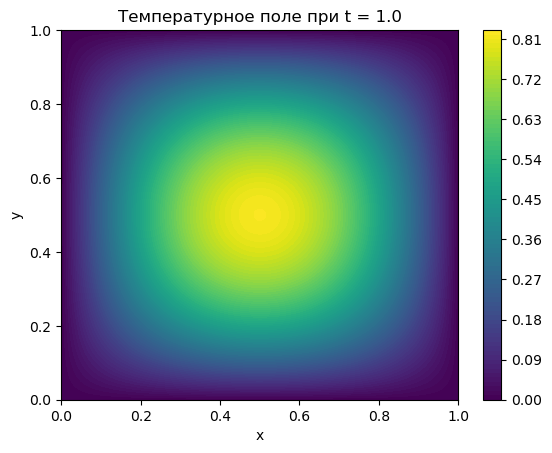

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange, get_num_threads, set_num_threads
import time


print("Число доступных потоков:", get_num_threads())
set_num_threads(12)

# Параметры
Lx, Ly = 1.0, 1.0
alpha = 0.01
Nx, Ny = 1000, 1000
dx, dy = Lx / (Nx - 1), Ly / (Ny - 1)
dx2, dy2 = dx**2, dy**2
dt = 0.5 * (dx2 * dy2) / (2 * alpha * (dx2 + dy2))  # Условие устойчивости
T_total = 1.0
Nt = int(T_total / dt)


print(f'Nt = {Nt}, Nx = {Nx}, Ny = {Ny}')

# Сетка
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Начальное условие
u = np.sin(np.pi * X / Lx) * np.sin(np.pi * Y / Ly)

# Явная схема — ускоренная Numba-функция с параллелизацией
@njit(parallel=True)
def solve_CPU(u, alpha, dt, dx2, dy2, Nt):
    for step in range(Nt):
        if step % 1000 == 0:
            #print(round(step/Nt*100, 2), "%")
            pass
        u_new = u.copy()
        for i in prange(1, u.shape[0] - 1):  # prange вместо range для распараллеливания
            for j in range(1, u.shape[1] - 1):
                u_new[i, j] = u[i, j] + alpha * dt * (
                    (u[i+1, j] - 2*u[i, j] + u[i-1, j]) / dx2 +
                    (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / dy2
                )
        u = u_new
    return u

start_time = time.time()

# Решение
u = solve_CPU(u, alpha, dt, dx2, dy2, Nt)

end_time = time.time()
print(f'Время выполнения на CPU: {round(end_time - start_time, 2)} секунд')

# Визуализация
plt.contourf(X, Y, u, levels=100, cmap='viridis')
plt.colorbar()
plt.title(f"Температурное поле при t = {T_total}")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Nt = 79840, Nx = 1000, Ny = 1000
Время выполнения на GPU: 38.51 секунды


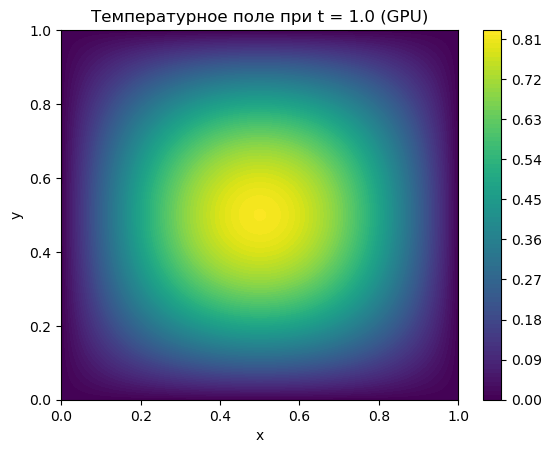

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import cuda
import time


#print("CUDA доступна в Numba:", cuda.is_available())
#print("Доступные CUDA-устройства:")
#for i in range(cuda.gpus.lst.__len__()):
#    gpu = cuda.gpus[i]
#    print(f"GPU {i}: {gpu.name.decode()}")



# Параметры модели
Lx, Ly = 1.0, 1.0
alpha = 0.01
Nx, Ny = 1000, 1000
dx, dy = Lx / (Nx - 1), Ly / (Ny - 1)
dx2, dy2 = dx**2, dy**2
dt = 0.5 * (dx2 * dy2) / (2 * alpha * (dx2 + dy2))
T_total = 1.0
Nt = int(T_total / dt)

print(f'Nt = {Nt}, Nx = {Nx}, Ny = {Ny}')

# Инициализация сетки и начальных условий
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)
u = np.sin(np.pi * X / Lx) * np.sin(np.pi * Y / Ly).astype(np.float32)

# CUDA-ядро для решения уравнения
@cuda.jit
def solve_kernel(u, u_new, alpha, dt, dx2, dy2):
    i, j = cuda.grid(2)
    
    # Вычисление нового значения
    if 1 <= i < u.shape[0]-1 and 1 <= j < u.shape[1]-1:
        u_new[i,j] = u[i,j] + alpha * dt * (
            (u[i+1,j] - 2*u[i,j] + u[i-1,j])/dx2 + 
            (u[i,j+1] - 2*u[i,j] + u[i,j-1])/dy2
        )

# Основная функция решения
def solve_GPU(u, alpha, dt, dx2, dy2, Nt):
    d_u = cuda.to_device(u)
    d_u_new = cuda.to_device(u.copy())
    
    # Конфигурация запуска (16x16 потоков на блок)
    threads = (16, 16)
    blocks = (
        (u.shape[0] + threads[0] - 1) // threads[0],
        (u.shape[1] + threads[1] - 1) // threads[1]
    )
    
    for step in range(Nt):
        if step % 10000 == 0:
            #print(round(step/Nt*100, 2), "%")
            pass
        solve_kernel[blocks, threads](
            d_u, d_u_new, 
            np.float32(alpha), np.float32(dt),
            np.float32(dx2), np.float32(dy2)
        )
        d_u, d_u_new = d_u_new, d_u
    
    return d_u.copy_to_host()

start_time = time.time()

# Запуск вычислений и визуализация
u = solve_GPU(u, alpha, dt, dx2, dy2, Nt)

end_time = time.time()
print(f'Время выполнения на GPU: {round(end_time - start_time, 2)} секунды')

plt.contourf(X, Y, u, levels=100, cmap='viridis')
plt.colorbar()
plt.title(f"Температурное поле при t = {T_total} (GPU)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Точное решение 1 задачи

Максимальная ошибка: 1.13e-07


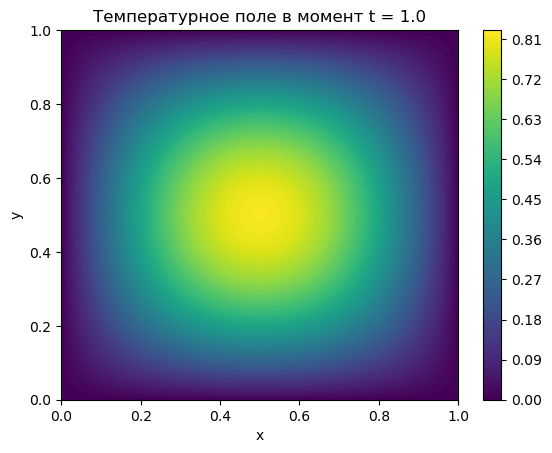

In [3]:
u_exact = np.sin(np.pi * X / Lx) * np.sin(np.pi * Y / Ly) * np.exp(-alpha * np.pi**2 * (1/Lx**2 + 1/Ly**2) * T_total)
error = np.abs(u - u_exact).max()
print(f"Максимальная ошибка: {error:.2e}")

# Визуализация
plt.contourf(X, Y, u_exact, levels=100, cmap='viridis')
plt.colorbar()
plt.title(f"Температурное поле в момент t = {T_total}")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

#### Зависимость времени вычислений и ошибки от размера сетки

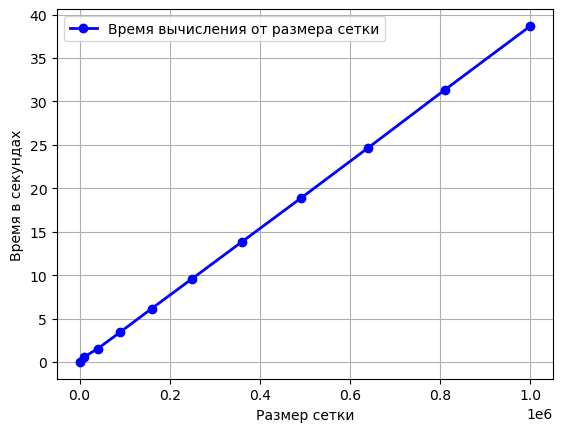

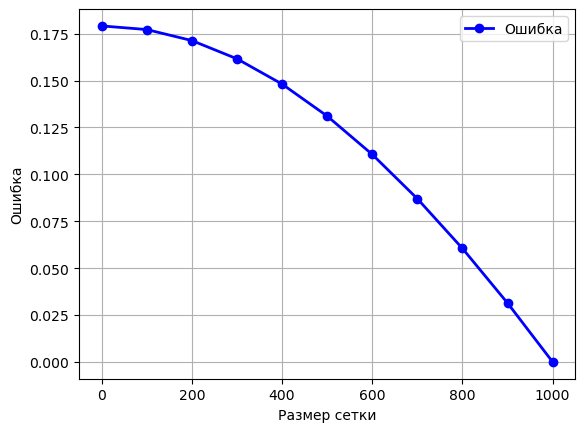

In [ ]:
N_values = [i * 100 for i in range(11)]
times = []
space = []
errors = []
for N_v in N_values:
    Nx_var = N_v
    Ny_var = N_v
    space.append(Nx_var)

    # Параметры модели
    Lx, Ly = 1.0, 1.0
    alpha = 0.01
    dx, dy = Lx / (Nx_var - 1), Ly / (Ny_var - 1)
    dx2, dy2 = dx**2, dy**2
    dt = 0.5 * (dx2 * dy2) / (2 * alpha * (dx2 + dy2))
    T_total = 1.0
    Nt = int(T_total / dt)

    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)

    u = np.sin(np.pi * X / Lx) * np.sin(np.pi * Y / Ly).astype(np.float32)
    u_exact = np.sin(np.pi * X / Lx) * np.sin(np.pi * Y / Ly) * np.exp(-alpha * np.pi**2 * (1/Lx**2 + 1/Ly**2) * T_total)

    start_time = time.time()
    u = solve_GPU(u, alpha, dt, dx2, dy2, Nt)
    end_time = time.time()

    error = np.abs(u - u_exact).max()
    errors.append(error)
    times.append(end_time - start_time)

space = [item ** 2 for item in space]

# Визуализация
plt.plot(space, times, 'b-', linewidth=2, label='Время вычисления от размера сетки', marker='o')
plt.xlabel('Размер сетки')
plt.ylabel('Время в секундах')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(N_values, errors, 'b-', linewidth=2, label='Ошибка', marker='o')
plt.xlabel('Размер сетки')
plt.ylabel('Ошибка')
plt.legend()
plt.grid(True)
plt.show()

#print(space)
#print(times)

# 2 Задача. Уравнение Пуассона в 1D

## 1) Постановка задачи

**Уравнение:**

$$
\frac{d^2 u}{dx^2} = -1, \quad x \in [0, 1]
$$

**Граничные условия (условия Дирихле):**

$$
u(0) = 0, \quad u(1) = 0
$$


### Аналитическое решение

Интегрируем уравнение дважды:

**Первое интегрирование:**

$$
\frac{du}{dx} = -x + C_1
$$

**Второе интегрирование:**

$$
u(x) = -\frac{x^2}{2} + C_1 x + C_2
$$

Подставляем граничные условия:

- При $x = 0$:

  $$
  u(0) = C_2 = 0
  $$

- При $x = 1$:

  $$
  u(1) = -\frac{1}{2} + C_1 = 0 \quad \Rightarrow \quad C_1 = \frac{1}{2}
  $$

**Итоговое решение:**

$$
u_{\text{exact}}(x) = -\frac{x^2}{2} + \frac{x}{2}
$$

## 2) Численный метод

### Метод конечных разностей (явная схема)

**Дискретизация области:**

Разбиваем отрезок $[0,1]$ на $N$ частей:  
$x_i = i h$, где $h = \frac{1}{N}$, $i = 0, \dots, N$

**Аппроксимация второй производной:**

$$
\frac{u_{i-1} - 2u_i + u_{i+1}}{h^2} = -1
$$

**Система уравнений:**

Для внутренних точек ($i = 1, \dots, N-1$):

$$
u_{i-1} - 2u_i + u_{i+1} = -h^2
$$

С граничными условиями:  
$u_0 = 0$, $u_N = 0$


### Матричная форма

Трёхдиагональная система:

$$
\begin{pmatrix}
1 & 0 & 0 & \cdots & 0 \\
-1 & 2 & -1 & \cdots & 0 \\
0 & -1 & 2 & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & -1 \\
0 & \cdots & 0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
u_0 \\
u_1 \\
\vdots \\
u_{N-1} \\
u_{N}
\end{pmatrix}
=
-h^2
\begin{pmatrix}
0 \\
1 \\
\vdots \\
1 \\
0
\end{pmatrix}
$$


## 3) Вычислительная сложность

Будем использовать использовать:
- Метод трехдиагональной прогонки

Он прямой и имеет O(N) ассимптотику, поэтому проблем с вычислениями не будет. Распараллелить этот алгоритм вряд ли возможно, посколько он пошаговый, однако этого и не нужно из-за O(N) ассимптотики

Так же дальше можно будет увидеть, что ошибки метода очень мала и ошибка округление преобладает над ошибкой метода, в связи с чем растет суммарная ошибка при увеличение количества узлов. Так же есть некоторая нелинейность, которая возможно связана с борьбой ошибки метода и ошибки округления

In [5]:
def thomas_algorithm(a, b, c, d):
    n = len(d)
    
    c_prime = [0] * n
    d_prime = [0] * n
    x = [0] * n

    # Прямой ход
    c_prime[0] = c[0] / b[0]
    d_prime[0] = d[0] / b[0]

    for i in range(1, n):
        denom = b[i] - a[i - 1] * c_prime[i - 1]
        c_prime[i] = c[i] / denom if i < n - 1 else 0
        d_prime[i] = (d[i] - a[i - 1] * d_prime[i - 1]) / denom

    # Обратный ход
    x[-1] = d_prime[-1]
    for i in range(n - 2, -1, -1):
        x[i] = d_prime[i] - c_prime[i] * x[i + 1]

    return x

#### Решение на сетке из N = 10000 узлов, сравнение с точным решением

Максимальная ошибка: 1.4893919431102631e-12


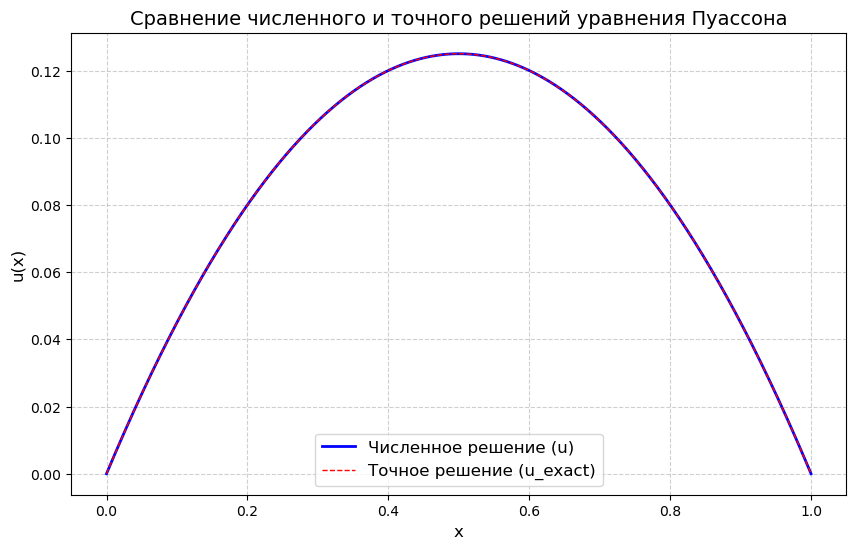

In [6]:
N = 10000

# Зададим параметры сетки
x = np.linspace(0, 1, N + 1)
h = 1/N


# Зададим матрицы для решения СЛАУ
main_diag = np.ones(N + 1) # b
main_diag[1:-1] = 2
lower_diag = -np.ones(N) # a
lower_diag[-1] = 0
upper_diag = -np.ones(N) # c
upper_diag[0] = 0
A = np.diag(main_diag) + np.diag(lower_diag, k=-1) + np.diag(upper_diag, k=1)

b = np.zeros(N + 1) # d
b[1:-1] = h**2


# Решение СЛАУ и вычисление ошибки
u = thomas_algorithm(lower_diag, main_diag, upper_diag, b)

u_exact = -1 * x**2 / 2 + x / 2
error = np.max(np.abs(u - u_exact))
print(f'Максимальная ошибка: {error}')

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x, u, 'b-', linewidth=2, label='Численное решение (u)')
plt.plot(x, u_exact, 'r--', linewidth=1, label='Точное решение (u_exact)')
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x)', fontsize=12)
plt.title('Сравнение численного и точного решений уравнения Пуассона', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Зависимость ошибки от размера сетки

C:\Users\maslo\AppData\Local\Temp\ipykernel_15720\3036299877.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


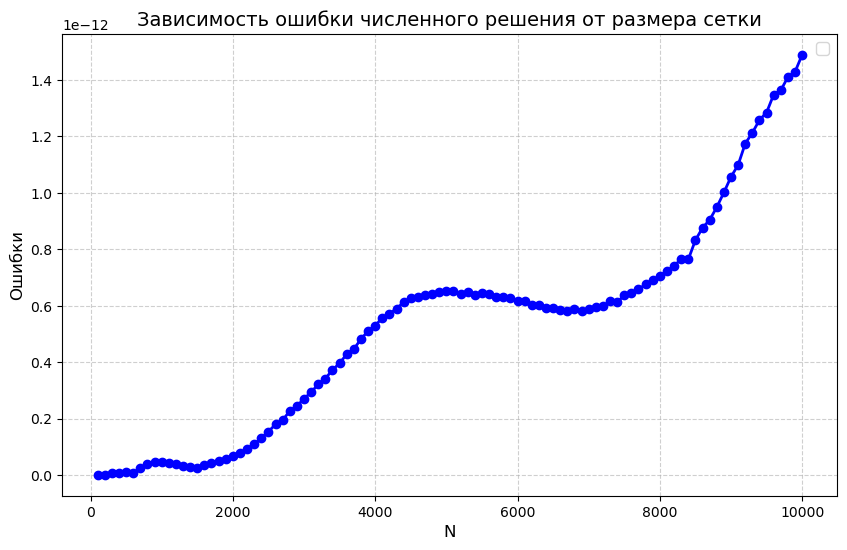

In [7]:
errors_puas = []
N_values_puas = [i * 100 for i in range(1, 101)]

for N in N_values_puas:
    # Зададим параметры сетки
    x = np.linspace(0, 1, N + 1)
    h = 1/N

    if N % 1000 == 0:
        #print(N)
        pass

    # Зададим матрицы для решения СЛАУ
    main_diag = np.ones(N + 1) # b
    main_diag[1:-1] = 2
    lower_diag = -np.ones(N) # a
    lower_diag[-1] = 0
    upper_diag = -np.ones(N) # c
    upper_diag[0] = 0
    A = np.diag(main_diag) + np.diag(lower_diag, k=-1) + np.diag(upper_diag, k=1)

    b = np.zeros(N + 1) # d
    b[1:-1] = h**2


    # Решение СЛАУ и вычисление ошибки
    u = thomas_algorithm(lower_diag, main_diag, upper_diag, b)

    u_exact = -1 * x**2 / 2 + x / 2
    error = np.max(np.abs(u - u_exact))
    errors_puas.append(error)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(N_values_puas, errors_puas, 'b-', linewidth=2, marker='o')
plt.xlabel('N', fontsize=12)
plt.ylabel('Ошибки', fontsize=12)
plt.title('Зависимость ошибки численного решения от размера сетки', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()